<a href="https://colab.research.google.com/github/theBuluku/The-Autolib-Super-Project/blob/master/The_Autolib_Super_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Set-Up


In [0]:
#Importing the tools to use in the project.

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Hypothesis Statement.

There are more blue cars at a particular station during weekdays as compared to weekends.

#Data Display

In [7]:
#Importing/loading our data through the url method.
#Loading my dataset for analysis
url='http://bit.ly/DSCoreAutolibDataset'
autolib_dataset= pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_dataset.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


Checking more information in the dataset.

In [8]:
#Giving a brief information about the dataset.
autolib_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [9]:
#Displays all the information of all the columns.
autolib_dataset.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5/22/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [11]:
#Displys names of all columns
autolib_dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [12]:
#gives the number of rows and columns
print(autolib_dataset.shape)

(16085, 13)


In [14]:
print(autolib_dataset.nunique())

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64


#DATA CLEANING.

In [0]:
#Dropping unnecessary columns
autolib_dataset.drop(["Utilib_taken_sum", "Utilib_returned_sum","Utilib_14_taken_sum","Utilib_14_returned_sum"], axis = 1, inplace = True)


In [16]:
#Displaying the remaining names of all columns
autolib_dataset.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Slots_freed_sum',
       'Slots_taken_sum'],
      dtype='object')

In [17]:
autolib_dataset=autolib_dataset.rename({'Postal code':'POSTAL_CODE','date':'DATE','n_daily_data_points':'DAILY_DATA_POINTS','dayOfWeek':'DAY','day_type':'DAY_TYPE','BlueCars_taken_sum':'SUM_OF_BLUECARS_TAKEN','BlueCars_returned_sum':'SUM_OF_BLUECARS_RETURNED','Slots_freed_sum':'SUM_OF_FREED_SLOTS','Slots_taken_sum':'SUM_OF_TAKEN_SLOTS'}, axis='columns')

autolib_dataset.head()

,POSTAL_CODE,DATE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [18]:
autolib_dataset.fillna(autolib_dataset.mean())
autolib_dataset.head(10)

,POSTAL_CODE,DATE,DAILY_DATA_POINTS,DAY,DAY_TYPE,SUM_OF_BLUECARS_TAKEN,SUM_OF_BLUECARS_RETURNED,SUM_OF_FREED_SLOTS,SUM_OF_TAKEN_SLOTS
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,23,22


Checking for Outliiers.

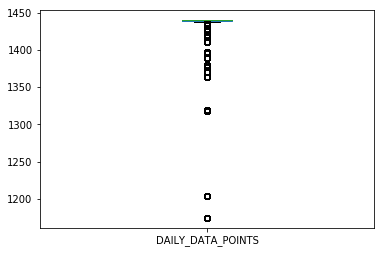

In [19]:
#checking for outliers
autolib_dataset['DAILY_DATA_POINTS'].plot(kind='box')

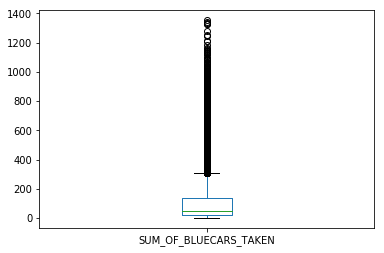

In [20]:
autolib_dataset['SUM_OF_BLUECARS_TAKEN'].plot(kind='box')